In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchcontrib
from torchvision import transforms
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import math


from trainer import Trainer
from model import LSTM
from utils import extend, get_prediction

In [2]:
torch.manual_seed(2)

<IPython.core.display.Javascript object>


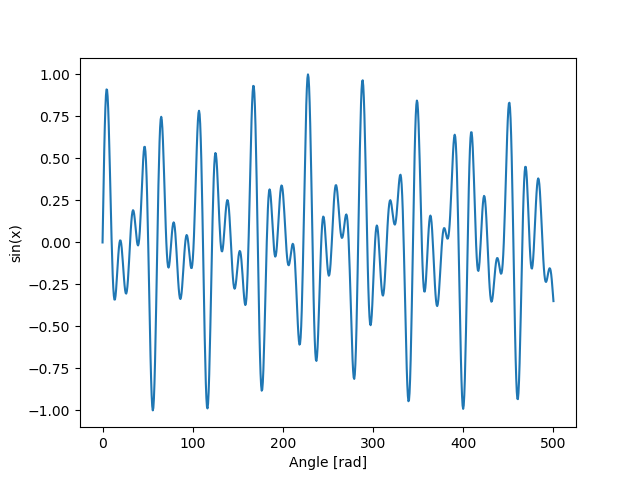

In [3]:
%matplotlib notebook
x = np.linspace(0,500, 800)
out = np.sin(0.2*x)+np.sin(0.311*x)+np.sin(0.42*x)#+np.sin(0.51*x)+np.sin(0.74*x)
scaler = MinMaxScaler((-1,1))
out = np.squeeze(scaler.fit_transform(out.reshape(-1,1)))
plt.plot(x, out)
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

In [4]:
input_seq_len = 20
output_seq_len = 1
shift_per_batch = 1
epochs = 300
batch_size = 6

batch_num = (len(out)-input_seq_len+shift_per_batch)/shift_per_batch - output_seq_len

x_in = np.array([out[i*shift_per_batch:i*shift_per_batch+input_seq_len] 
           for i in range(int(batch_num))])

y_in = np.array([out[i*shift_per_batch+input_seq_len:i*shift_per_batch+input_seq_len+output_seq_len] 
           for i in range(int(batch_num))])

x_train = torch.from_numpy(x_in[:round(x_in.shape[0]*0.7),:]).t().unsqueeze(-1).float()
x_test = torch.from_numpy(x_in[round(x_in.shape[0]*0.7):,:]).t().unsqueeze(-1).float()
y_train = torch.from_numpy(y_in[:round(y_in.shape[0]*0.7),:]).t().float()
y_test = torch.from_numpy(y_in[round(y_in.shape[0]*0.7):,:]).t().float()

x_full = torch.from_numpy(x_in).t().unsqueeze(-1).float()
y_full = torch.from_numpy(y_in).t().float()

In [5]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape, x_full.shape, y_full.shape

(torch.Size([20, 546, 1]),
 torch.Size([20, 234, 1]),
 torch.Size([1, 546]),
 torch.Size([1, 234]),
 torch.Size([20, 780, 1]),
 torch.Size([1, 780]))

In [6]:
trainer = Trainer(input_size = 1,
                  hidden_size = 128,
                  batch_size = batch_size,
                  output_dim = (512,64,output_seq_len),
                  num_layers = 1,
                  learning_rate = 0.01,
                  seq_len = input_seq_len)

In [7]:
for t in range(epochs):
    loss_train = trainer.learn(x_train,y_train)
    loss_test, _ = trainer.evaluate(x_test,y_test)
    print('epoch = {} - train loss ---> {:05f} - val loss ---> {:05f}'.format(t,loss_train,loss_test))
trainer.optimizer.swap_swa_sgd()

epoch = 0 - train loss ---> 0.183418 - val loss ---> 26.899033
epoch = 1 - train loss ---> 27.110224 - val loss ---> 137.702942
epoch = 2 - train loss ---> 138.930801 - val loss ---> 1.614556
epoch = 3 - train loss ---> 1.802707 - val loss ---> 4.038701
epoch = 4 - train loss ---> 4.027510 - val loss ---> 2.147237
epoch = 5 - train loss ---> 2.321305 - val loss ---> 13.752867
epoch = 6 - train loss ---> 14.054841 - val loss ---> 4.313703
epoch = 7 - train loss ---> 4.451466 - val loss ---> 0.156154
epoch = 8 - train loss ---> 0.172100 - val loss ---> 2.567206
epoch = 9 - train loss ---> 2.557065 - val loss ---> 2.757533
epoch = 10 - train loss ---> 2.746811 - val loss ---> 0.220337
epoch = 11 - train loss ---> 0.255478 - val loss ---> 8.600820
epoch = 12 - train loss ---> 8.808660 - val loss ---> 4.580338
epoch = 13 - train loss ---> 4.747727 - val loss ---> 2.340413
epoch = 14 - train loss ---> 2.527277 - val loss ---> 0.269446
epoch = 15 - train loss ---> 0.309183 - val loss ---> 3.0

epoch = 130 - train loss ---> 0.000582 - val loss ---> 0.001036
epoch = 131 - train loss ---> 0.000587 - val loss ---> 0.001002
epoch = 132 - train loss ---> 0.000581 - val loss ---> 0.001007
epoch = 133 - train loss ---> 0.000576 - val loss ---> 0.001040
epoch = 134 - train loss ---> 0.000579 - val loss ---> 0.001012
epoch = 135 - train loss ---> 0.000573 - val loss ---> 0.000988
epoch = 136 - train loss ---> 0.000573 - val loss ---> 0.000993
epoch = 137 - train loss ---> 0.000568 - val loss ---> 0.000982
epoch = 138 - train loss ---> 0.000566 - val loss ---> 0.000952
epoch = 139 - train loss ---> 0.000565 - val loss ---> 0.000953
epoch = 140 - train loss ---> 0.000558 - val loss ---> 0.000965
epoch = 141 - train loss ---> 0.000557 - val loss ---> 0.000940
epoch = 142 - train loss ---> 0.000553 - val loss ---> 0.000926
epoch = 143 - train loss ---> 0.000550 - val loss ---> 0.000929
epoch = 144 - train loss ---> 0.000547 - val loss ---> 0.000907
epoch = 145 - train loss ---> 0.000542 -

epoch = 259 - train loss ---> 0.000428 - val loss ---> 0.000563
epoch = 260 - train loss ---> 0.000428 - val loss ---> 0.000562
epoch = 261 - train loss ---> 0.000427 - val loss ---> 0.000560
epoch = 262 - train loss ---> 0.000427 - val loss ---> 0.000559
epoch = 263 - train loss ---> 0.000426 - val loss ---> 0.000558
epoch = 264 - train loss ---> 0.000425 - val loss ---> 0.000556
epoch = 265 - train loss ---> 0.000425 - val loss ---> 0.000555
epoch = 266 - train loss ---> 0.000424 - val loss ---> 0.000554
epoch = 267 - train loss ---> 0.000423 - val loss ---> 0.000552
epoch = 268 - train loss ---> 0.000423 - val loss ---> 0.000551
epoch = 269 - train loss ---> 0.000422 - val loss ---> 0.000550
epoch = 270 - train loss ---> 0.000422 - val loss ---> 0.000548
epoch = 271 - train loss ---> 0.000421 - val loss ---> 0.000547
epoch = 272 - train loss ---> 0.000420 - val loss ---> 0.000546
epoch = 273 - train loss ---> 0.000420 - val loss ---> 0.000545
epoch = 274 - train loss ---> 0.000419 -

In [10]:
def get_prediction(x, shift ,output_size, lookahead, trainer):
    outputs = []
    init_hidden = 479
    for i in range(round(lookahead/output_size) + init_hidden):
        if i == 0:
            trainer.model.hidden = (torch.zeros(trainer.model.num_layers,
                                                1,
                                                trainer.model.hidden_dim),
                                    torch.zeros(trainer.model.num_layers,
                                                1,
                                                trainer.model.hidden_dim))
        if i < init_hidden + 1:
            input_model = x[:,i-(init_hidden+1)]
            output = trainer.predict(input_model.unsqueeze(2))
        else:
            input_model = torch.roll(input_model,-output_size)
            input_model[-output.shape[0]:] = output
            output = trainer.predict(input_model.unsqueeze(2))
        outputs += [output]
        
    return torch.cat(outputs[init_hidden:]).numpy()

In [8]:
lookahead = 101
predictions = get_prediction(x_full,shift_per_batch,output_seq_len,lookahead,trainer)
predictions.shape

(101, 1)

<IPython.core.display.Javascript object>


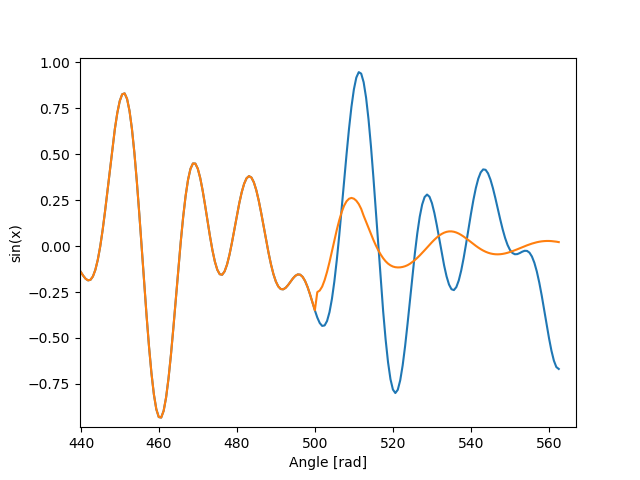

In [9]:
%matplotlib notebook
x = np.linspace(0,500, 800)
x_new = extend(x,lookahead)
out_new = np.sin(0.2*x_new)+np.sin(0.311*x_new)+np.sin(0.42*x_new)#+np.sin(0.51*x_new)+np.sin(0.74*x_new)
out_pred = np.append(out, predictions[1:])
scaler = MinMaxScaler((-1,1))
out_new = np.squeeze(scaler.fit_transform(out_new.reshape(-1,1)))
# scaler1 = MinMaxScaler((-1,1))
# out_pred = np.squeeze(scaler1.fit_transform(out_pred.reshape(-1,1)))
plt.plot(x_new, out_new)
plt.plot(x_new, out_pred)
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()